In [1]:
import sys
sys.path.append('../../plots')   
from aj_plt_templates import (draw_basis)

import matplotlib.pyplot as plt
import numpy as np, cv2
from scipy.spatial.transform import Rotation as R

In [2]:
# disregard its for outputting nice looking matrices/vectors
import os
# set working dir to repo directory
head, tail = os.path.split(os.getcwd())
while tail != 'aj_python_tool_lib':
    head, tail = os.path.split(head)
os.chdir(os.path.join(head, tail))
os.getcwd()
from misc_tools.print_latex import print_tex

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

### Disregard, its for future

In [3]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 2.0
thickness = 4
txt = 'YES'

(H,W), off = cv2.getTextSize(txt, font, fontScale, thickness)
print((H,W), off)

blank = np.zeros((W,H), dtype = np.uint8)
cv2.putText(blank, txt, (0,W-1), font, fontScale, 255, thickness, cv2.LINE_AA)
blank = np.uint8(blank > 128)*255
blank =np.rot90(blank, -1)
#center = np.array(blank.shape)//2

where_white = np.argwhere(blank==255)
#plt.scatter(*where_white.T,s= 15);

(118, 44) 20


## Vector, Coordinate System, Transpose

There are multiple definitions for a vector. 

In a geometric sense it is an oriented interval, length and orientation of which can be described as a collection of numbers tied to a coordinate system it was measured in.

These numbers show how to construct a specific vector from collection of basis vectors, which are fundamental building blocks of a corrdinate system.

In simplest case of ortho-normal (Cartesian) coordinate system basis, vectors are orthogonal and have unit length, which make decomposition of a vector into a sum of basis vectors very simple.

Vectors are described by coeficients of basis vector expansion, stored in a row or column array. By default we store vectors in a column.

Cartesian basis vectors in 2D are $\vec{e}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}; \vec{e}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$,

and vector components are stored in row array $\vec{v}^T = \begin{bmatrix}v_1 & v_2 \end{bmatrix}$,

which by default implies that $\vec{v}$ is expanded in terms of Cartesian basis $ \vec{v}^T = \begin{bmatrix}v_1 & v_2 \end{bmatrix}_{Cartersian} =  v_1 \vec{e}_1 + v_2 \vec{e}_2 $

Subscript T denotes a transpose operation, which changes column representation to row representation:

$\vec{u}^T = \begin{bmatrix}u_1 \\ u_2 \end{bmatrix}^T = \begin{bmatrix}u_1 & u_2 \end{bmatrix}$

## Vector addition and multiplication

Like with scalars it is possible add two vectors together, multiply vector by a number and multiply two vectors together.
***

$\vec{u} + \vec{b} = u_1  \vec{e}_1  + v_1  \vec{e}_1  + \ldots =  (u_1 +v_1) \vec{e}_1 + (u_2 +v_2)  \vec{e}_2 = \begin{bmatrix} u_1 +v_1 & u_2 +v_2 \end{bmatrix} $

$\vec{u}^T + \vec{b}^T = \begin{bmatrix} u_1 +v_1 \\ u_2 +v_2 \end{bmatrix} = \begin{bmatrix} u_1 +v_1 & u_2 +v_2 \end{bmatrix}^T$
***

if $\alpha$ is a scalar

$\vec{u} = \alpha\vec{v} =  \alpha v_1 \vec{e}_1 + \alpha v_2 \vec{e}_2 = \begin{bmatrix}\alpha v_1 & \alpha v_2 \end{bmatrix} = \begin{bmatrix} u_1& u_2 \end{bmatrix}$
***


In [15]:
u = np.array([[1,2,3]])
b = np.array([[4,5,6]])
a = 4

print_tex(u     , '+', b     ,'=', u+b       )  
print_tex(u.T   , '+', b.T   ,'=', u.T+b.T   ) 
print_tex(str(a), '*', u     ,'=', a*u       )   

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

There are different types of multiplication for vectors, one of most common is a dot product, which is defined as:

dot($\vec{u}, \vec{v}$) 
$=\vec{u}\cdot \vec{v} = \vec{u}^T \vec{v}= 
\begin{bmatrix} u_1 & u_2 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \sum_{i=1}^2 u_i  v_i$

for example consider a dot product of Cartesian 2D basis vectors:

$\vec{e}_1 \cdot \vec{e}_2 = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}  = 1 \cdot 0 + 0 \cdot 1 = 0$

$\vec{e}_1 \cdot \vec{e}_1 = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}  = 1 \cdot 1 + 0 \cdot 0 = 1$


$\vec{e}_i \cdot \vec{e}_j = \delta{i,j} =
\begin{cases}
1, & i=j \\
0, & i \neq j
\end{cases} $ (in general)

This helps us to explain the dot product for arbitrary vectors in Cartesian space:

$\vec{u}\cdot \vec{v} = (v_1 \vec{e}_1 + v_2 \vec{e}_2) \cdot (u_1 \vec{e}_1 + u_2 \vec{e}_2) = $

$= v_1 u_1 (\vec{e}_1 \cdot \vec{e}_1 ) + v_1 u_2 (\vec{e}_1 \cdot \vec{e}_2 ) + \ldots = $

$=\sum_{i=1}^2 \sum_{j=1}^2 v_i u_j (\vec{e}_i \cdot \vec{e}_j ) = \sum_{i=1}^2 \sum_{j=1}^2 v_i u_j \delta_{i,j} = $

$=\sum_{\substack{i = 1 \\ j = i}}^2  v_i u_j = \sum_{i=1}^2 v_i u_i$


In [17]:
print('in numpy, 1d vectors dont have to be reshaped into rows and columns.')
e1 = np.array([1,0])
e2 = np.array([0,1])
print_tex(e1,r'\cdot',e1,'=',np.dot(e1,e1))  
print_tex(e1,r'\cdot',e2,'=',str(np.dot(e1,e2)))  
u = np.array([1,1])
v = np.array([2,2])
print_tex(u,r'\cdot',v,'=',str(np.dot(u,v)))  

in numpy, 1d vectors dont have to be reshaped into rows and columns.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Matrices
Matrices are deeper layer of abstraction, but they can be viewed as a collection of vectors inside a contained (another vector):

It can be viewed as a collection of row vectors:

$U = 
\begin{bmatrix} u_{1,1} & u_{1,2} \\ u_{2,1} & u_{2,2} \end{bmatrix} = 
\begin{bmatrix} \begin{bmatrix} u_{1,1} & u_{1,2} \end{bmatrix} \\ \begin{bmatrix} u_{2,1} & u_{2,2} \end{bmatrix} \end{bmatrix} = 
\begin{bmatrix} \vec{u}_1^T \\ \vec{u}_2^T \end{bmatrix} $


Matrix-vector multiplication is an extension of dot product and can represented as dot products of vectors hidden inside:

$U \vec{v}=\begin{bmatrix} u_{1,1} & u_{1,2} \\ u_{2,1} & u_{2,2} \end{bmatrix}
\begin{bmatrix} v_1 \ v_2 \end{bmatrix}=
\begin{bmatrix} 
    \vec{u}_1^T \\
    \vec{u}_2^T 
\end{bmatrix} \vec{v} =
\begin{bmatrix}
    \vec{u}_1^T \vec{v} \\
    \vec{u}_2^T \vec{v}
\end{bmatrix}=
\begin{bmatrix}
\begin{bmatrix} u_{1,1} & u_{1,2} \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
\\
\begin{bmatrix} u_{2,1} & u_{2,2} \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}
\end{bmatrix} =
\begin{bmatrix}
u_{1,1} \cdot v_1 + u_{1,2} \cdot v_2
\\
u_{2,1} \cdot v_1 + u_{2,2} \cdot v_2
\end{bmatrix}$

<font color=red>__Notice__</font>
that this multiplication can be interpreted as a linear combination of matrix $M$ 
<font color=red>columns</font>:

$U\vec{v}=
\begin{bmatrix} \begin{bmatrix} u_{1,1} \\ u_{2,1}  \end{bmatrix} \cdot v_1  +  \begin{bmatrix} u_{1,2} \\ u_{2,2}  \end{bmatrix} \cdot v_2\end{bmatrix}=
\begin{bmatrix} 
   u_{1,1} \cdot v_1 + u_{1,2} \cdot v_2 
   \\ 
   u_{2,1} \cdot v_1 + u_{2,2} \cdot v_2 
\end{bmatrix}
$
***

Or matrix can be viewed as a collection of column vectors:

$U = 
\begin{bmatrix} u_{1,1} & u_{1,2}  \\  u_{2,1} & u_{2,2}  \end{bmatrix}= 
\begin{bmatrix} \begin{bmatrix} u_{1,1} \\ u_{2,1} \end{bmatrix} & \begin{bmatrix} u_{1,2} \\ u_{2,2} \end{bmatrix} \end{bmatrix} =
\begin{bmatrix} \vec{u}_1 & \vec{u}_2 \end{bmatrix}$

$\vec{v}^T U = 
\begin{bmatrix} v_1 & v_2 \end{bmatrix} 
\begin{bmatrix} u_{1,1} & u_{1,2}  \\  u_{2,1} & u_{2,2} \end{bmatrix} = 
\vec{v}^T
\begin{bmatrix} \vec{u}_1 & \vec{u}_2 \end{bmatrix}  = 
\begin{bmatrix}  \vec{v}^T\vec{u}_1 & \vec{v}^T \vec{u}_2 \end{bmatrix}  = 
\begin{bmatrix} 
   \begin{bmatrix} v_1 & v_2 \end{bmatrix} \begin{bmatrix} u_{1,1} \\ u_{2,1} \end{bmatrix} 
   & 
   \begin{bmatrix} v_1 & v_2 \end{bmatrix} \begin{bmatrix} u_{1,2} \\ u_{2,2} \end{bmatrix} 
\end{bmatrix}=
\begin{bmatrix} 
    (v_1 \cdot u_{1,1} + v_2 \cdot u_{2,1} )
   &&
    (v_1 \cdot u_{1,2} + v_2 \cdot u_{2,2}) 
\end{bmatrix}$

<font color=red>__Notice__</font>
 that this multiplication can be interpreted as a linear combination of matrix $M$ 
 <font color=red>rows</font>:

$\vec{v}^TU = 
\begin{bmatrix} v_1 \cdot \begin{bmatrix} u_{1,1} & u_{1,2}  \end{bmatrix}  \\ + \\ v_2 \cdot \begin{bmatrix} u_{2,1} & u_{2,2}  \end{bmatrix}\end{bmatrix}=
\begin{bmatrix} \begin{bmatrix} v_1 \cdot u_{1,1} & v_1 \cdot u_{1,2} \end{bmatrix}  \\ + \\ \begin{bmatrix} v_2 \cdot u_{2,1} & v_2 \cdot u_{2,2} \end{bmatrix} \end{bmatrix}=
\begin{bmatrix} 
    (v_1 \cdot u_{1,1} + v_2 \cdot u_{2,1} )
   &&
    (v_1 \cdot u_{1,2} + v_2 \cdot u_{2,2} )
\end{bmatrix}
$
***

Matrix-matrix multiplication is an extension of vector-matrix multiplication, but row and column approaches converge:

$U V=
\begin{bmatrix} 
   \begin{bmatrix} u_{1,1} &  u_{1,2} \end{bmatrix} \\ 
   \begin{bmatrix} u_{2,1} &  u_{2,2} \end{bmatrix}
\end{bmatrix}
\begin{bmatrix} 
   \begin{bmatrix} v_{1,1} \\ v_{2,1} \end{bmatrix} &  
   \begin{bmatrix} v_{1,2} \\ v_{2,2} \end{bmatrix} 
\end{bmatrix}=
\begin{bmatrix} \vec{u}_1^T \\ \vec{u}_2^T \end{bmatrix}  
\begin{bmatrix} \vec{v}_1 & \vec{v}_2 \end{bmatrix}= 
\begin{bmatrix} 
   \begin{bmatrix} 
      \vec{v}_1^T \bm{\vec{v}_1}
      \\
      \vec{u}_2^T \bm{\vec{v}_1}
   \end{bmatrix} 
   &
   \begin{bmatrix} 
      \vec{u}_1^T \bm{\vec{v}_2}
      \\ 
      \vec{v}_2^T \bm{\vec{v}_2}
   \end{bmatrix}
\end{bmatrix}$
***
***

In [6]:
U = np.array([[1,2],[3,4]])
M = np.array([[1,0],[0,1]])
print_tex('M =',M)
print_tex('U =',U)  
print_tex('MU =',M,U,'=',U @ M)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
v = np.array([[1,1]]).T # to row vector
print_tex('v =', v)  
print_tex('v^T M =',v.T, M, '=', v.T @ M) 
print_tex('M v=',M, v,'=',M @ v) 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Transformation matrix from $ℝ^n$ to $ℝ^n$' can be constructed by expressing new basis in terms of old CS basis.

<font color=red>__NOTE__:</font> top and bottom indicies are mimicing style of tensor analysis, where they mean covariant and contravariant components.

<font color=red>__NOTE__:</font> in this case of ON-CS, there is no difference between two, but style completely mirrors column and row indexing style. Top =  column, bottom = row

<font color=red>__NOTE__:</font> like $\lVert\vec{v}\rVert^2 = \vec{v}^T \cdot \vec{u}= \sum_{i=1}^3 u^i  u_i$ 
***


You may define a vector using properties of a dot product:

$\vec{v} =
\begin{bmatrix} v_1 & v_2 \end{bmatrix} \begin{bmatrix} \vec{v}_1  \\ \vec{u}_2  \end{bmatrix}=
\vec{u}^T\vec{v} =
\sum_{i=1}^2 v^i \vec{u}_i =
\begin{bmatrix} \vec{v}_1 && \vec{u}_2  \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} =
\vec{v}^T\vec{v} =
\sum_{i=1}^2 \vec{u}^i v_i  $

Because $\vec{u}_i$ is a column vector,
shape of $\begin{bmatrix} \vec{u}_1 && \vec{u}_2  \end{bmatrix}$ , in 2D, is $2 \times 2$ and it
makes more sense than other option of shape $1 \times 4$:

So 
$\vec{u} =
\begin{bmatrix} \vec{u}_1 && \vec{u}_2  \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}= 
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}=
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix}_{Cartesian}$ 
***


Basis vector transformation $T$ allows you to express new basis in terms of old basis, for example:

$\begin{cases}
    \vec{v}_1 = \alpha \cdot \vec{v}_1 + \beta \cdot \vec{u}_2 \\ 
    \vec{u}_2 = \gamma \cdot \vec{v}_1 + \delta \cdot \vec{u}_2 
\end{cases}
\longleftrightarrow 
\begin{bmatrix} \vec{v}_1\\ \vec{u}_2\end{bmatrix} =
\begin{bmatrix} \alpha  & \beta \\ \gamma & \delta  \end{bmatrix}
\begin{bmatrix} \vec{v}_1\\ \vec{v}_2\end{bmatrix}
\longleftrightarrow 
\begin{bmatrix} \vec{u}_1 & \vec{u}_2\end{bmatrix} =
\begin{bmatrix} \vec{u}_1 & \vec{u}_2\end{bmatrix}
\begin{bmatrix} \alpha & \gamma \\ \beta  & \delta  \end{bmatrix}
$

Lets keep last result, as it conforms to vectors being columns:

$
\vec{u}^{\prime T} =  \vec{u}^T M
\longleftrightarrow 
\vec{u}^{\prime j} = \sum_{i=1}^2 E^{i} T^j_i
$

For example if $\vec{V}_1$ is twice as long as $\vec{e}_1$ and $\vec{e}_2$ is the same as $\vec{v}_2$:

$T = \begin{bmatrix} \alpha & \gamma \\ \beta  & \delta  \end{bmatrix} = \begin{bmatrix} 2  & 0 \\ 0 & 1  \end{bmatrix}$, so

$\vec{E}_1 = 
\begin{bmatrix} \vec{e}_1 & \vec{e}_2\end{bmatrix}
\begin{bmatrix} \alpha  \\ \beta \end{bmatrix}=
\begin{bmatrix} \vec{e}_1 & \vec{E}_2\end{bmatrix}
\begin{bmatrix} 2  \\ 0 \end{bmatrix}=
\begin{bmatrix} 1  & 0 \\ 0 & 1  \end{bmatrix}
\begin{bmatrix} 2  \\ 0 \end{bmatrix}=
\begin{bmatrix} 2  \\ 0 \end{bmatrix}=
2 \cdot \vec{v}_1
$
***

__Vector $\vec{v}$, as a geometric object, can be represented in different coordinate systems (CS) with coordinates $v^\prime_i $ and $v_i$.__

$\vec{v} = \vec{u}_{CS1}= \sum_{i=1}^3 M^i v_i  =  U^T \vec{u} $

$\vec{v} = \vec{u}_{CS2}=\sum_{i=1}^3 M^{\prime i} v^\prime_i  = U^{\prime T} \vec{v} $
***

__Question is: how will the coordinates of a vector $\vec{v}$ change if we change a coordinate system?__

_Method using summation:_

$\vec{v} = 
\sum_{i=1}^3 M^i v_i  =
\sum_{i=1}^3 U^{\prime i} v^\prime_i 
\stackrel{\text{transform}}{=}
\sum_{i=1}^3  (\sum_{j=1}^3 M^{ j} U^i_j ) v^\prime_i  
\stackrel{\text{move summs}}{=}
$

$
\sum_{j=1}^3 T^j (\sum_{i=1}^3 E^i_j v^\prime_i )  
\stackrel{\text{swap i,j}}{=}
\sum_{i=1}^3 E^i (\sum_{j=1}^3 E^j_i v^\prime_j )
\rightarrow 
$

$
\rightarrow
v_i = \sum_{j=1}^3 E^j_i v^\prime_j \longleftrightarrow \vec{u} = E \vec{u}
$


_Method using matrix multiplication:_

if $M$ is an Identity matrix, which has properties: $\vec{v} = \vec{v}U = M\vec{u}$ and $U^T = T$,

and $E^{-1}$ is an inverse of $E$, such as $E E^{-1} = E^{-1} E = E $

$
T^{\prime T} \vec{u} = 
\vec{v} = E^T \vec{u}= 
T^T 
\underline{(E \vec{v})} $

$
T^{\prime T} \vec{u} =
(T^T T) \vec{v} =
I^T 
\underline{(I \vec{v})} $

We see that marked terms must be equal, so

$(I \vec{u}  = I \vec{u} )$
$\bigg| \bm{T^{-1}} \cdot 
\rightarrow 
$

$
\bm{T^{-1}} \vec{u} = 
(I \bm{T^{-1}}) \vec{u} = 
\vec{u}\vec{u} = 
\vec{u}
$ 

or

$
\vec{V} = M \vec{e}
$


_Overall:_

| $\vec{v} = M \vec{v}$ | $\longleftrightarrow$ | $\vec{u} = \bm{T^{-1}} \vec{u}$ |
| --- | --- | --- |
| $\vec{v}^T =  \vec{u}^{\prime T} \bm{T^{-1}}$ | $\longleftrightarrow $ | $\vec{v}^{\prime T} =  \vec{u}^T U$ |


Basis and coordinates transform in an inverse way. 

Check that vector does not change in any coordinate system:$

$\vec{v} = 
M^T \vec{v} = 
(\vec{u}^{\prime T} \bm{T^{-1}}) \vec{u} = 
\vec{u}^{\prime T} \bm{T^{-1}} (U \vec{u}) =
\vec{u}^{\prime T} (\bm{T^{-1}} T) \vec{u} = 
\vec{u}^{\prime T} \vec{V}
$
***

<font color=red>__Notice__</font> that if $\vec{v}^T = M = \{[1,0,0],[0,1,0],[0,0,1]\}= U^T = \vec{v}$, which is a Cartesian basis, then

$
\vec{u}^{\prime T} = 
\vec{u}^T M = 
U T = E 
\longleftrightarrow
\vec{v}^{\prime} = 
E^T
$,

which means if you know where new basis vectors go, you can use them to easily construct transformation matrix.

## Visualize transformed points/vectors. 
Plots work in cartesian space with cartesian basis vectors and coordinates.

You can create points/vectors $\vec{v}$ in transformed space, but have to express them in terms of cartesian base.

Thus, we use this transformations: $\vec{v} = M \vec{u}$ and  $\vec{u}^{\prime T} = \
U$

(3, 1393)
(3, 1393)


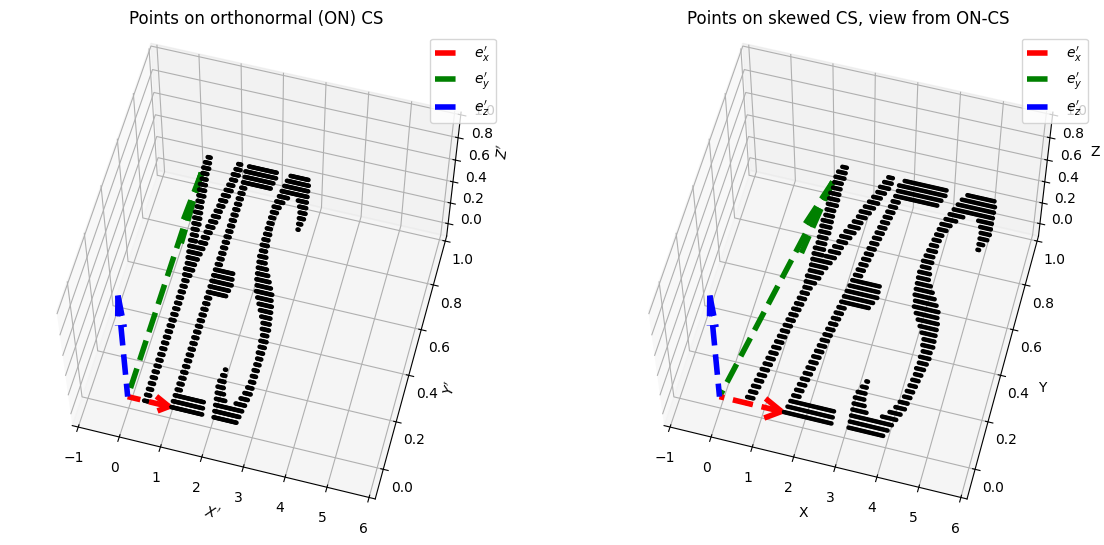

In [8]:
u1 = [1.5, 0, 0]
u2 = [1  , 1, 0]
u3 = [0  , 0, 1]
E_prim = np.array([u1,u2,u3])   # basis vectors as columns
T = E_prim.T

# lets consider that sample text is drawn in skewed space.
# pad z dimension and scale down
pad = np.zeros((len(where_white),1)) 
where_white_3D = 0.025*np.hstack((where_white,pad)) # shape (N,3), need (3,N for scatter)
where_white_3D = where_white_3D.T
print(where_white_3D.shape)
where_white_prim =   T @ where_white_3D
print(where_white_prim.shape)
fig, ax = plt.subplots(1, 2, figsize=(14, 8), subplot_kw=dict(projection='3d'))
point_size = 5
draw_basis(ax[0], ls=['dashed']*3, linewidth = 4, lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'])
draw_basis(ax[1], E_prim, clrs = ['r','g','b'], lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'], linewidth = 4,ls=['dashed'])
ax[0].set_xlabel('$X^{\prime}$')
ax[0].set_ylabel('$Y^{\prime}$')
ax[0].set_zlabel('$Z^{\prime}$')

ax[0].scatter(*where_white_3D,s = point_size,c='k',alpha =1)
ax[1].scatter(*where_white_prim, s = point_size,c='k', alpha =1 )

ax[0].set_title(f'Points on orthonormal (ON) CS')
ax[1].set_title(f'Points on skewed CS, view from ON-CS')
for i in range(2):
    ax[i].legend()
    ax[i].view_init(elev=60, azim=-75)
    ax[i].set_xlim(-1,6)
    ax[i].set_ylim(-0.1,1)
    ax[i].set_zlim(-0.1,1)



## Gram-Schmidt procedure (new basis from non-co-planar 3 vectors)
This method allows to create an orthogonal basis $\{\vec{v}_i\}$ from non-co-planar vectors $\{\vec{v}_i\}$. Principle is simple:

Take first vector $\vec{u}_1 = \vec{u}_1 $ as a first basis vector. 

$\vec{v}_2$  can be decomposed into parallel and perpendicular compoenents to $\vec{u}_1 $, so $\vec{v}_2 = \vec{u}_{2,parallel} + \vec{u}_{2,perpendicular} $.

Parallel component $\vec{u}_{2,parallel}$ is just a $\vec{u}_1$ projection onto $\vec{v}_1$.

For orthogonal basis we need perpendicular component: $\vec{u}_{2,perpendicular} = \vec{v}_2 - \vec{u}_{2,parallel}$.
 
Repeat with next vectors.

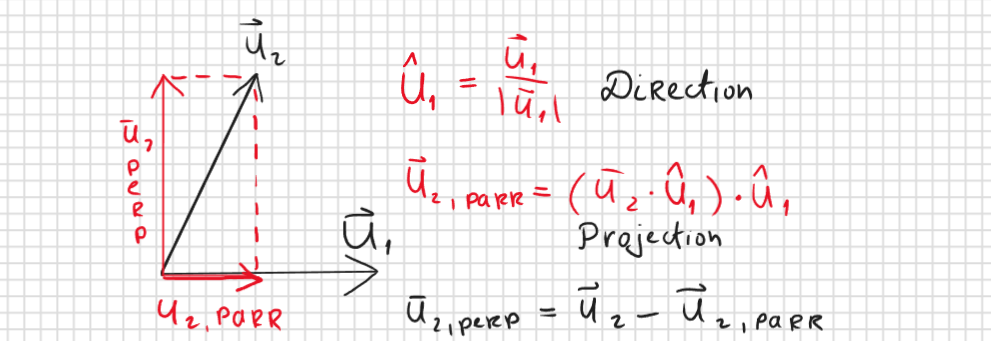

In [9]:
  
def orthoganalize_rows(arr):
    """ do it element-row wise """
    row_norms = np.linalg.norm(arr, axis=1)
    return (arr.T / row_norms).T

def gram_schmidt(u1,u2,u3=None):
    if u3 is None:
        u3 = np.cross(u1,u2)    # ORTHOGONAL TO BOTH
    v1 = u1
    v2 = u2 - np.dot(u2,u1)/np.dot(v1,v1)*v1
    v3 = u3 - np.dot(u3,u1)/np.dot(v1,v1)*v1 - np.dot(u3,u2)/np.dot(v2,v2)*v2
    u_out = orthoganalize_rows(np.array([u1,u2,u3]))
    v_out = orthoganalize_rows(np.array([v1,v2,v3]))
    return v_out, u_out

In [10]:
u1 = np.array([-0.25,1,0], float)
u2 = np.array([-0.5,1,1], float)

exyz_prim, exyz_og = gram_schmidt(u1,u2)

print_tex(np.array([[r'\vec{v}_1', r'\vec{v}_2', r'\vec{v}_3']]).T,'=',exyz_prim);

ij = [[0,1],[0,2],[1,2]]
dots = [np.dot(exyz_prim[i],exyz_prim[j])                       for i,j in ij]
strings = [r'\vec{v}'+ f'_{i}'+ r'\cdot \vec{v}'+ f'_{j} = '    for i,j in ij]

[print_tex(s,v) for s,v in zip(strings,dots)];

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

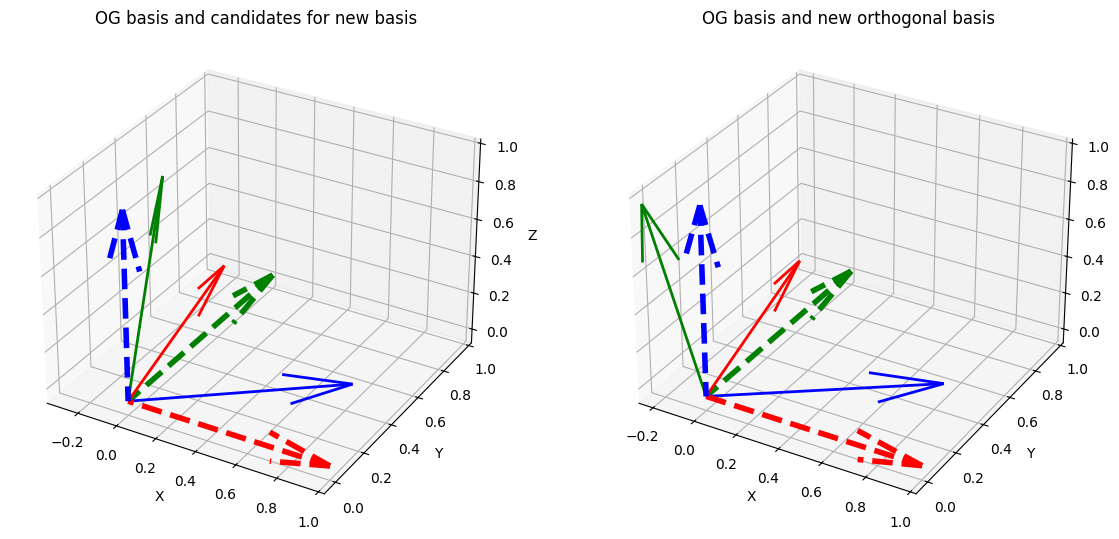

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), subplot_kw=dict(projection='3d'))

draw_basis(ax[0], ls=['dashed']*3, linewidth = 4)
draw_basis(ax[0], exyz_og, clrs = ['r','g','b'], lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'], linewidth = 2)
ax[0].set_title(f'OG basis and candidates for new basis')
draw_basis(ax[1], ls=['dashed']*3, linewidth = 4)
draw_basis(ax[1], exyz_prim, clrs = ['r','g','b'], lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'], linewidth = 2)
ax[1].set_title(f'OG basis and new orthogonal basis');

# Vector rotation using pivot axis
Vectors can be rotated using rotation matrices. 

General rotation can be described by 3 degrees of freedom (yaw, pitch, roll), but it can be decomposed into 3 sequential rotations about single specific axis.

In this example i create first vector $\vec{v}$ and rotate it once. I create a second vector $\vec{v}$ , which is a rotated version on $\vec{u}$.

Next, i want to draw an arc between these two vectors, but its difficult if both vectors dont lie in XY/YZ/XZ planes.

I can create a new coordinate system from $\vec{u}$  and $\vec{v}$, draw an arc there, and transform to Cartesian Coordinate System.

<font color=red>__NOTE__:</font> Rotation transformation has an inverse, which is simply a rotation in opposite direction. Bonus is that inverse of a rotation matrix is simply its transpose.

<font color=red>__NOTE__:</font> This results from cos(x) and sin(x) being even and odd funcitons respectively.

(40, 3)


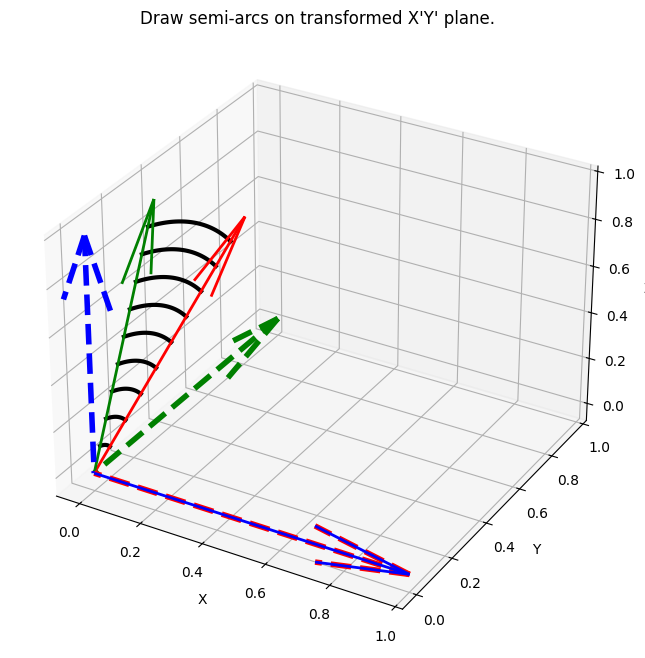

In [12]:
u1 = np.array([0,1,0], float)
u1 /= np.linalg.norm(u1)

Rx = R.from_euler('x', 35, degrees=True)
#Rz = R.from_euler('z', 15, degrees=True)
   
u2 = Rx.apply(Rx.apply(u1))   # twice rotated u1
u1 = Rx.apply(u1)             # once rotated u1
# get transform. have to get and use an inverse transform
def draw_arc_between_vectors(u1,u2):
    """
    1) create an orthogonal coordinate system using both vectors
    2) calculate angle between them and generate arc points in cartesian system
    3) transform points to new orthogonal system
    returns transformed points and new coordinate system basis vectors as rows of a matrix
    """
    vecs = np.array([u1,u2])
    T, exyz_OG  = gram_schmidt(*vecs)
    angle       = np.arccos(np.clip(np.dot(*vecs),-1,1))

    t = np.linspace(0,angle, 40)

    arc_pts = np.array([np.cos(t),np.sin(t),0*t]).T # points on XY plane of an orthonormal CS

    return arc_pts @ T, exyz_OG

xy_prim, exyz_OG = draw_arc_between_vectors(u1,u2)
print(xy_prim.shape)
fig, ax = plt.subplots(1, 1, figsize=(14, 8), subplot_kw=dict(projection='3d'))
ax = [ax]
draw_basis(ax[0], ls=['dashed']*3, linewidth = 4)
draw_basis(ax[0], exyz_OG, clrs = ['r','g','b'], lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'], linewidth = 2)

for r in np.arange(0.1,1,0.1):
    ax[0].plot(*xy_prim.T*r, c = 'k', lw=3)

ax[0].set_title(f'Draw semi-arcs on transformed X\'Y\' plane.');

# Coordinate transformations via Euler angles. 
Here is an example of rotation using Euler angles. This transformation consists of three chained rotations about specific axis. Using Euler angle simplifies interpretation, since coordinate frame rotates with an object. Order and selected axis are specified as a sequence of axis names: "ZYZ" - rotates around Z axis, then rotates around new local Y axis and finally rotates around new Z axis.

<font color=red>__NOTE__:</font> similarly to other coordinate transforms, basis vectors transformation matrix is inverse of coordinate transformation matrix.

<font color=red>__NOTE__:</font> As noted previously inverse = transpose = reversed rotation direction

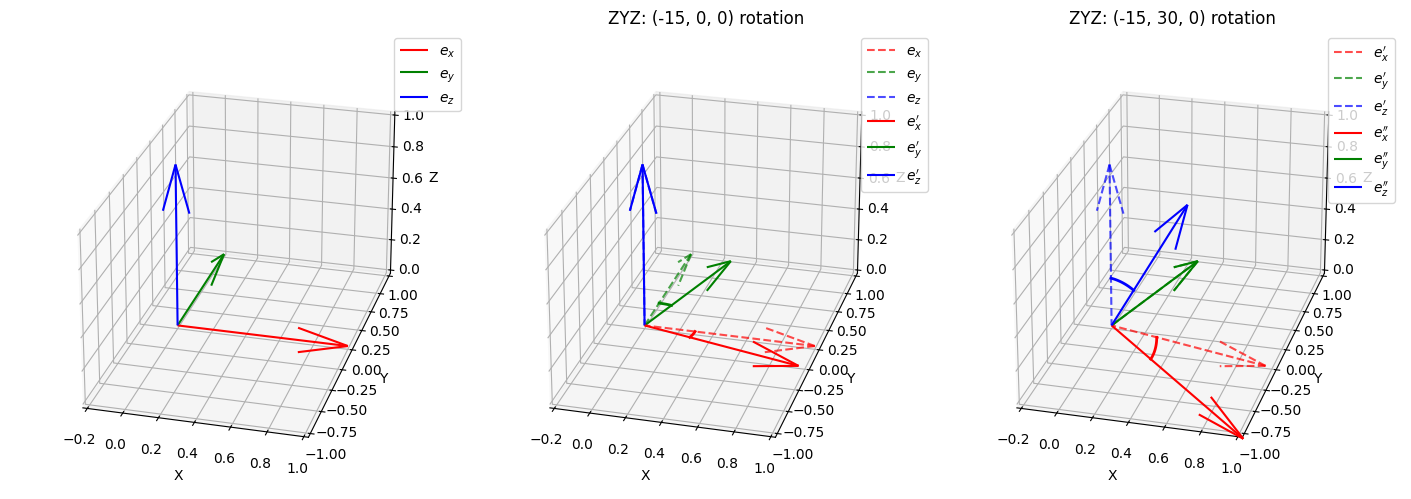

In [13]:
N = 3
fig, ax = plt.subplots(1, N, figsize=(14, 8), subplot_kw=dict(projection='3d'), layout="constrained")

draw_basis(ax[0])
ax[0].legend()
Z1 = -15
Y = 30
Z2 = 0

# first rotation
r1 = R.from_euler('zyz', [-Z1, 0, 0], degrees=True)
exyz = np.eye(3).astype(float)
exyz_prim = r1.as_matrix() @ exyz

draw_basis(ax[1], alpha=0.7, ls=['dashed']*3)
draw_basis(ax[1], exyz_prim, clrs = ['r','g','b'], lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'])

arc1, _ = draw_arc_between_vectors(exyz[0],exyz_prim[0])
arc2, _ = draw_arc_between_vectors(exyz[1],exyz_prim[1])

ax[1].plot(*arc1.T*0.3, c = 'r', lw=2)
ax[1].plot(*arc2.T*0.3, c = 'g', lw=2)

ax[1].set_title(f'ZYZ: {Z1,0,0} rotation')

# plus second rotation
r2 = R.from_euler('zyz', [-Z1, -Y, 0], degrees=True)
exyz_prim_prim = r2.as_matrix() @ exyz
draw_basis(ax[2], exyz_prim, alpha=0.7, ls=['dashed']*3, clrs = ['r','g','b'], lbls = ['$e_x^\prime$', '$e_y^\prime$','$e_z^\prime$'])
draw_basis(ax[2], exyz_prim_prim, clrs = ['r','g','b'], lbls = ['$e_x^{\prime\prime}$', '$e_y^{\prime\prime}$','$e_z^{\prime\prime}$'])

arc1, _ = draw_arc_between_vectors(exyz_prim[0],exyz_prim_prim[0])
arc2, _ = draw_arc_between_vectors(exyz_prim[2],exyz_prim_prim[2])
ax[2].plot(*arc1.T*0.3, c = 'r', lw=2)
ax[2].plot(*arc2.T*0.3, c = 'b', lw=2)

ax[2].set_title(f'ZYZ: {Z1,Y,0} rotation')


lims = [[-.2,1],[-1,1],[0,1]]
for i in range(3):
    ax[i].set_xlim(*lims[0])
    ax[i].set_ylim(*lims[1])
    ax[i].set_zlim(*lims[2])
    ax[i].set_aspect('equal')
    ax[i].legend()
    ax[i].view_init(elev=25, azim=-75)
